## Salary prediction using Polynomial Regression

Read CSV

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Data Gaji.csv')

Display df

In [ ]:
df.head().style.background_gradient(cmap='pink_r')

,tahun_berkerja,gaji
0,1,3900000
1,2,4600000
2,3,3700000
3,4,4300000
4,5,3900000


Display df info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tahun_berkerja  20 non-null     int64
 1   gaji            20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


Correlation analysis

In [ ]:
df.corr(method='pearson').style.background_gradient(cmap='pink_r')

,tahun_berkerja,gaji
tahun_berkerja,1.000000,0.882109
gaji,0.882109,1.000000


Sum null value

In [ ]:
df.isna().sum()

tahun_berkerja    0
gaji              0
dtype: int64

Separate x and y

In [ ]:
import numpy as np

X = np.array(df['tahun_berkerja'])
y = np.array(df['gaji'])

Split train and test to 70 and 30

In [ ]:
p70 = round((len(X))*(70/100))
p70

train_x = X[:p70]
train_y = y[:p70]

test_x = X[p70:]
test_y = y[p70:] 

Plot x and y

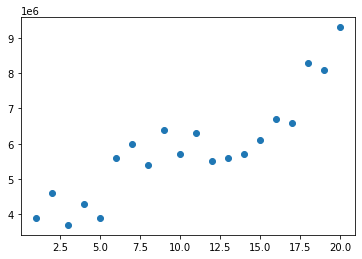

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

Fit model and plot model

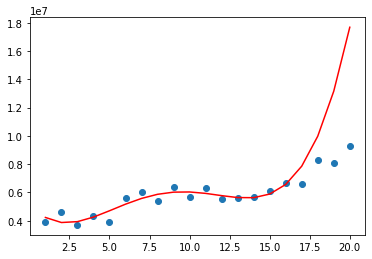

In [ ]:
import numpy
import matplotlib.pyplot as plt

model = numpy.polyfit(train_x, train_y, 4)
predict = numpy.poly1d(model)

plt.scatter(X, y)
plt.plot(X, predict(X), color='red')
plt.show()

Plot for test

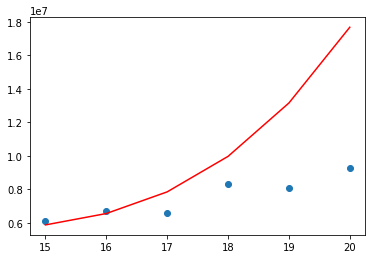

In [ ]:
import numpy
import matplotlib.pyplot as plt

model = numpy.polyfit(train_x, train_y, 4)
predict = numpy.poly1d(model)

plt.scatter(test_x, test_y)
plt.plot(test_x, predict(test_x), color='red')
plt.show()

Display prediction result in dataframe

In [ ]:
dfT = np.array([test_x, test_y, list(map(round,list(map(predict, test_x))))])
df_ = pd.DataFrame(dfT.T, columns=['Tahun Bekerja','Gaji','Prediksi Gaji'])
df_.head().style.background_gradient(cmap='pink_r')

,Tahun Bekerja,Gaji,Prediksi Gaji
0,15,6100000,5882418
1,16,6700000,6562537
2,17,6600000,7854720
3,18,8300000,9973405
4,19,8100000,13159787


Check score/r2 for train

In [ ]:
import math as m

xy_train = [x * y for (x, y) in zip(train_x, train_y)]
xx_train = [x * x for x in train_x]
yy_train = [y * y for y in train_y]
n_train = len(train_x)

f_atas_train = (n_train*sum(xy_train)) - (sum(train_x)*sum(train_y))
f_bawah_train =  m.sqrt(  
      ( n_train*(sum(xx_train)) - (sum(train_x)**2) ) * 
      ( n_train*sum(yy_train) - (sum(train_y)**2) )  
    )

r_train = f_atas_train / f_bawah_train
r_train**2

0.5660367589955994

Check score/r2 for test

In [ ]:
xy = [x * y for (x, y) in zip(test_x, test_y)]
xx = [x * x for x in test_x]
yy = [y * y for y in test_y]
n = len(test_x)

f_atas = (n*sum(xy)) - (sum(test_x)*sum(test_y))
f_bawah =  m.sqrt(  
      ( n*(sum(xx)) - (sum(test_x)**2) ) * 
      ( n*sum(yy) - (sum(test_y)**2) )  
    )

r = f_atas / f_bawah
r**2

0.8958254210378855

Try predict 3.5

In [ ]:
test = predict(3.5)
round(test)

4068947

Display polynomial model

In [ ]:
print(list(model))

[1114.938982586059, -37846.222405046836, 408988.9277389414, -1336265.6950892936, 5191108.891108993]


Create manual prediction function

In [ ]:
def myfunc(x):
  return model[0] * (x**4) + model[1] * (x**3) + model[2] * (x**2) + model[3] * x + model[4]

Try predict using manual prediction function

In [ ]:
round(myfunc(3.5))

4068947

Export model using  pickle

In [ ]:
import pickle

pickle.dump(predict, open("poly_predict.pkl", 'wb'))

Read model from pickle file

In [ ]:
new_predict = pickle.load(open("poly_predict.pkl", 'rb'))
round(new_predict(3.5))

4068947